<a href="https://colab.research.google.com/github/Julio-sourc/DataScience/blob/main/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
black = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [3]:
black.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
black.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Verificando dados Faltantes

In [6]:
del black['User_ID']
black.isnull()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,True,True,False
550064,False,False,False,False,False,False,False,False,True,True,False
550065,False,False,False,False,False,False,False,False,True,True,False
550066,False,False,False,False,False,False,False,False,True,True,False


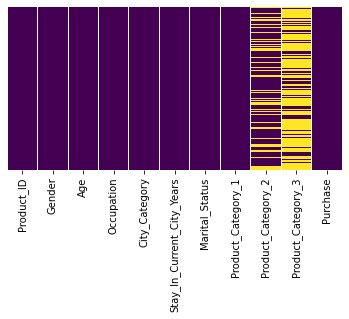

In [7]:
plt.figure(figsize=(6, 3))
sns.heatmap(black.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
black.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
black['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [10]:
black['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [11]:
#O modo() é usado para localizar a tendência central de dados numéricos ou nominais
black["Product_Category_2"].mode()[0]

8.0

In [12]:
#
black["Product_Category_2"]= black["Product_Category_2"].fillna(black["Product_Category_2"].mode()[0])

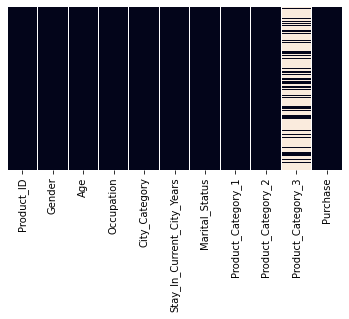

In [13]:
#verificando dados faltantes no gráfico
plt.figure(figsize=(6, 3))
sns.heatmap(black.isnull(), yticklabels=False, cbar=False,)

In [14]:
#mesmo tratamento para a coluna 3
black['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [15]:

black['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [16]:
black["Product_Category_3"].mode()[0]

16.0

In [17]:
black["Product_Category_3"]= black["Product_Category_3"].fillna(black["Product_Category_3"].mode()[0])

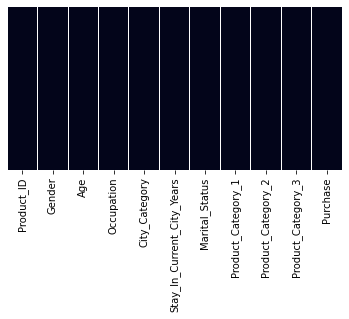

In [18]:
#verificando dados faltantes no gráfico
plt.figure(figsize=(6, 3))
sns.heatmap(black.isnull(), yticklabels=False, cbar=False,)

# Tratando dados Categoricos

In [19]:
black["Stay_In_Current_City_Years"]=black["Stay_In_Current_City_Years"].str.replace('+',"")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [20]:
black["Stay_In_Current_City_Years"]= black["Stay_In_Current_City_Years"].astype(int)
black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 46.2+ MB


In [21]:
black['Gender']= black['Gender'].map({'F':0,"M":1})
black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [22]:
#map() é útil quando você precisa aplicar uma função de transformação a cada item em um iterável e transformá-los em um novo iterável
black['Age']= black['Age'].map({'0-17':1,"18-25":2,"26-35":3,
                           "36-45":4,"46-50":5,"51-55":6,
                           "55+":7})
black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 46.2+ MB


In [23]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

black["Age"]= label_encoder.fit_transform(black["Age"])
black["Age"].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [24]:
#Indexando a coluna City_Category
black_city=pd.get_dummies(black['City_Category'],drop_first=True)
black_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [25]:
#Concatenação
black= pd.concat([black,black_city],axis=1)
black.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,6,16,C,4,0,8,8.0,16.0,7969,0,1


In [26]:
black.drop(["City_Category"], axis=1,inplace = True) 

In [27]:
black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int64(7), object(1), uint8(2)
memory usage: 43.0+ MB


In [28]:
#Transformando as colunas B e C em numericos 
black["B"]= black["B"].astype(int)
black["C"]= black["C"].astype(int)
black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int64  
 11  C                           550068 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 50.4+ MB


In [29]:
black["Gender"]= black["Gender"].astype(int)

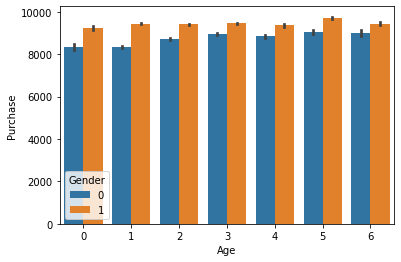

In [30]:
#Compra por idade  e sexo
sns.barplot(x='Age', y='Purchase', hue='Gender', data=black)

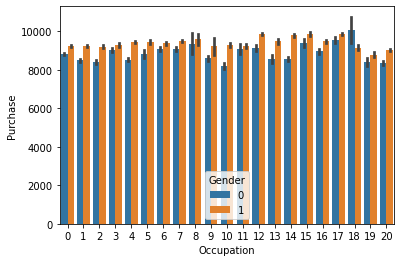

In [31]:
#Compra por ocupação e sexo
sns.barplot(x="Occupation",y="Purchase",hue='Gender',data=black)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


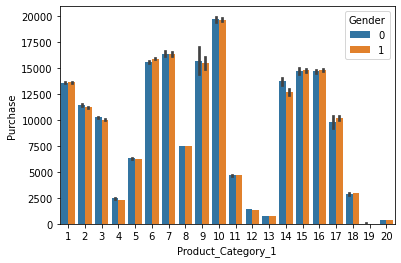

In [32]:
#Compra por categoria e sexo 
sns.barplot("Product_Category_1","Purchase",hue='Gender',data=black)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


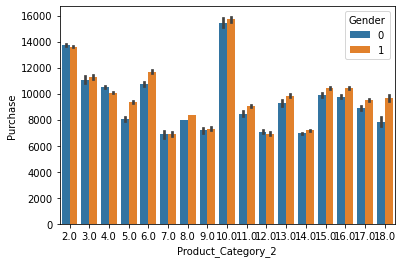

In [33]:
sns.barplot("Product_Category_2","Purchase",hue='Gender',data=black)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


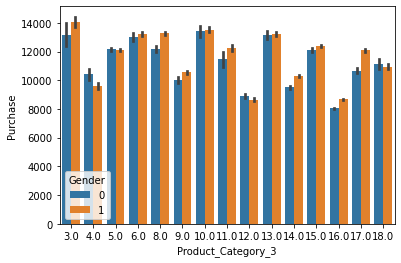

In [34]:
sns.barplot("Product_Category_3","Purchase",hue='Gender',data=black)

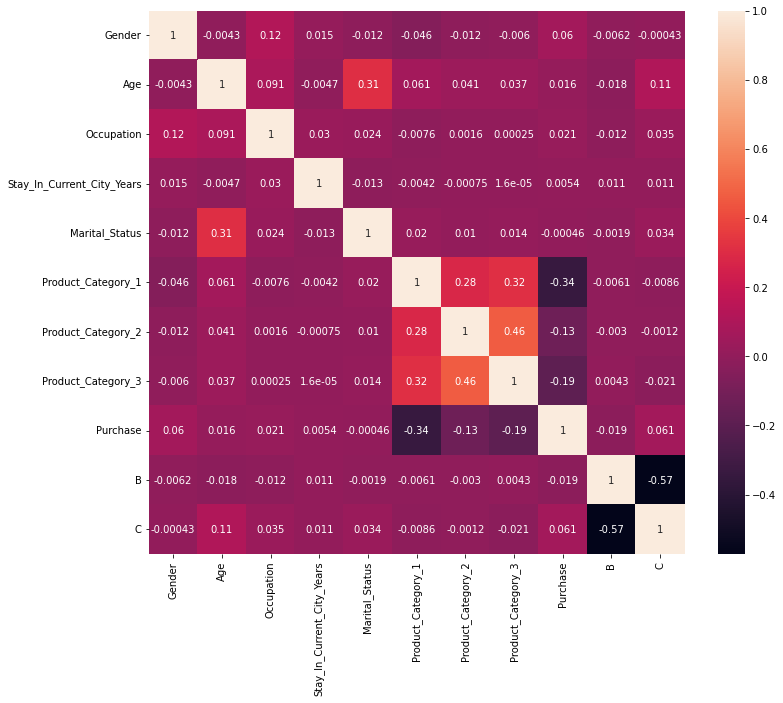

In [35]:
# Matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(black.corr(), annot=True)

In [36]:
black.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [37]:
black.drop("Product_ID", axis=1,inplace=True)

In [38]:
black.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

# Treinando os dados

In [39]:
y = black['Purchase']

In [40]:
X = black[['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'B', 'C']]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [79]:
from sklearn.linear_model import LinearRegression

In [44]:
#Criando uma instância de um modelo LinearRegression (), chamado lm
lm = LinearRegression()

In [45]:
#treine o lm com os dados de treinamento
lm.fit(X_train, y_train)

LinearRegression()

In [81]:
print(lm.intercept_)

12738.587016521138


In [82]:
#Print dos coeficientes do modelo
lm.coef_

array([ 522.34990751,  121.95388641,    6.06358139,   16.23036744,
        -41.88219388, -401.53618996,   -2.05957588, -155.44291917,
        166.55116766,  675.36691933])

In [47]:
# usando o lm.predict() para prever o conjunto X_test dos dados
prediction = lm.predict(X_test)

In [75]:
prediction

array([ 8160.26369251,  8322.47310839,  7800.49425037, ...,
        6938.04320138,  7317.92584243, 11073.54565118])

## **Avaliando o modelo**
vamos avalaiar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R^2)

Calculo do erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz.

In [48]:
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE :', metrics.mean_squared_error(y_test, prediction))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3574.3777049464165
MSE : 21874966.931325294
RMSE : 4677.0681982760625


In [50]:
import pprint
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [51]:
naive_bayes = black.copy()
naive_bayes

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,1,6,16,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,8.0,16.0,368,1,0
550064,0,2,1,3,0,20,8.0,16.0,371,0,1
550065,0,2,15,4,1,20,8.0,16.0,137,1,0
550066,0,6,1,2,0,20,8.0,16.0,365,0,1


In [52]:
X = naive_bayes.iloc[:, :-1].values
y = naive_bayes.iloc[:, -1].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
X_train.shape, y_train.shape

((440054, 10), (440054,))

In [55]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [56]:
pred = classifier.predict(X_test)
pred

array([1, 0, 1, ..., 1, 1, 1])

In [57]:
pprint.pprint(np.concatenate((pred.reshape(len(pred), 1), y_test.reshape(len(y_test), 1)),1))

array([[1, 1],
       [0, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])


In [58]:
df_pred = pd.DataFrame({'Pred': pred, 'Test': y_test})
df_pred

,Pred,Test
0,1,1
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
110009,0,0
110010,0,0
110011,1,0
110012,1,0


In [59]:
conf_matrix = confusion_matrix(y_test, pred)
acc_score = accuracy_score(y_test, pred)
conf_matrix, acc_score

(array([[46428, 29415],
        [    0, 34171]]), 0.7326249386441726)

In [60]:
class_repo = classification_report(y_test, pred)

In [61]:
pprint.pprint(class_repo)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      0.61      0.76     75843\n'
 '           1       0.54      1.00      0.70     34171\n'
 '\n'
 '    accuracy                           0.73    110014\n'
 '   macro avg       0.77      0.81      0.73    110014\n'
 'weighted avg       0.86      0.73      0.74    110014\n')


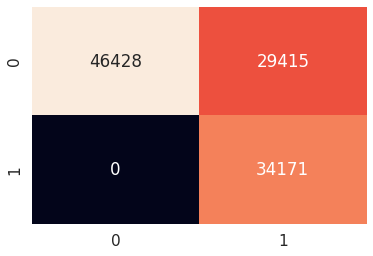

In [62]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, yticklabels=True)

# **Conclusão**

No desafio foram utilizados as técnicas Regressão linear e NAÏVE BAYES, na área de data science após ler os arquivos que vamos trabalhar, fazer as análises, e limpar os dados é recomendado usar duas ou mais técnicas de machine learn, por conseguinte, análisar as mesmas e chegar a conclusão de qual será o modelo ideal para aquela base de dados considerando as suas métricas, precision, recall e accuracy.

